In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
folder_path = "/home/t.afanasyeva/MAT_rnaseq/250314_output"
csv_files = [
    f
    for f in os.listdir(folder_path)
    if "statistically_significant" in f and f.endswith(".csv")
]

dataframes = {}
for file in csv_files:
    name = file.split("_")[0]
    file_path = os.path.join(folder_path, file)
    dataframes[name] = pd.read_csv(
        file_path,
    )


for name, df in dataframes.items():
    df["ligand"] = name

for name, df in dataframes.items():
    df["ligand"] = name
    df.rename(columns={"Unnamed: 0": "gene_symbol"}, inplace=True)

concatenated_df = pd.concat(dataframes.values(), ignore_index=True)
concatenated_df.to_csv(
    "/home/t.afanasyeva/MAT_rnaseq/250314_output/Supplementary_Table_2.csv", index=False
)

In [ ]:
folder_path = "/home/t.afanasyeva/MAT_rnaseq/250314_output"
csv_files = [
    f for f in os.listdir(folder_path) if "_go_terms" in f and f.endswith(".csv")
]

dataframes = {}
for file in csv_files:
    name = file.split("_")[0]
    file_path = os.path.join(folder_path, file)
    dataframes[name] = pd.read_csv(
        file_path,
    )


for name, df in dataframes.items():
    df["condition"] = name

for name, df in dataframes.items():
    df["condition"] = name
    df.rename(columns={"Unnamed: 0": "gene_symbol"}, inplace=True)

concatenated_df = pd.concat(dataframes.values(), ignore_index=True)

# Define the conditions for the two groups
group1_conditions = ["LPS", "Fla-PA", "Pam3", "PGN", "R848"]
group2_conditions = [
    cond
    for cond in concatenated_df["condition"].unique()
    if cond not in group1_conditions
]

# Create the two dataframes
df_group1 = concatenated_df[concatenated_df["condition"].isin(group1_conditions)]
df_group2 = concatenated_df[concatenated_df["condition"].isin(group2_conditions)]

# Save the dataframes to CSV files
df_group1.to_csv(
    "/home/t.afanasyeva/MAT_rnaseq/250314_output/Supplementary_Table_3_genes_GO.csv",
    index=False,
)
df_group2.to_csv(
    "/home/t.afanasyeva/MAT_rnaseq/250314_output/Supplementary_Table_4_fsde_GO.csv",
    index=False,
)

In [2]:
import pickle

file_path = "/home/t.afanasyeva/MAT_rnaseq/250314_output/list_of_gene_name_set_1000"

with open(file_path, "rb") as f:
    list_of_gene_name_sets_1000 = pickle.load(f)
len(list_of_gene_name_sets_1000)
from collections import Counter

cnt_gene = Counter()
gene_list_unpacked_1000 = []

for gene_set in list_of_gene_name_sets_1000:
    for gene in gene_set:
        gene_list_unpacked_1000.append(gene)

for gene in gene_list_unpacked_1000:
    cnt_gene[gene] += 1

cnt_gene.total()

249996

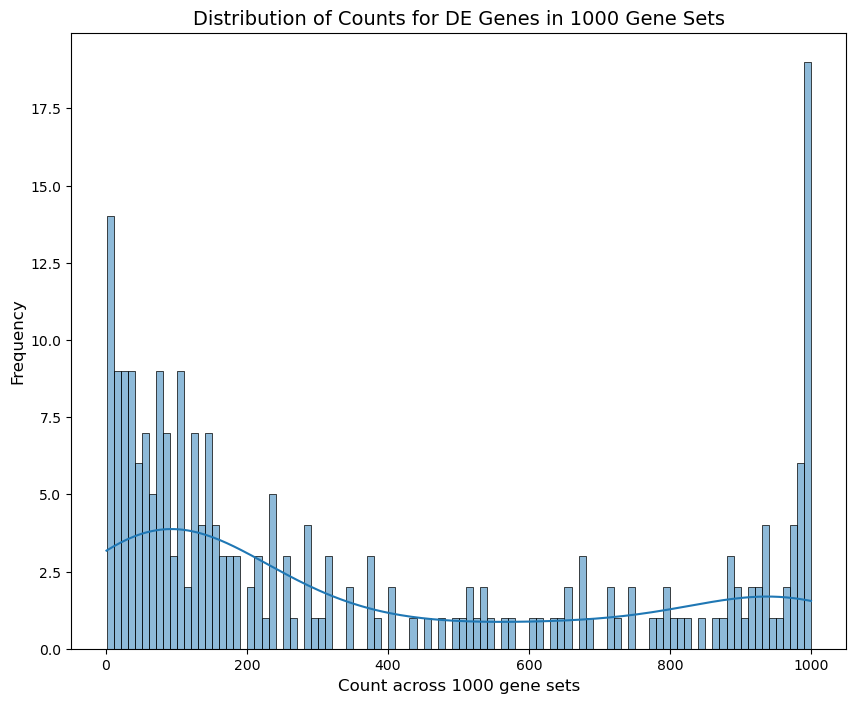

In [ ]:
most_common_genes = cnt_gene.most_common()
# Load the list of differentially expressed genes
with open("/home/t.afanasyeva/MAT_rnaseq/250314_output/de_genes.txt", "r") as file:
    de_genes = set(file.read().splitlines())

# Create the dataframe
df_most_common_genes = pd.DataFrame(most_common_genes, columns=["gene", "count"])

# Add the 'differentially_expressed' column
df_most_common_genes["differentially_expressed"] = df_most_common_genes["gene"].apply(
    lambda gene: gene in de_genes
)
# df_most_common_genes.to_csv(
#     "/home/t.afanasyeva/MAT_rnaseq/250314_output/Supplementary_Table_5_fsde.csv",
#     index=False,
# )

df_diff_expr = df_most_common_genes[
    df_most_common_genes["differentially_expressed"] == True
]
# Plot the distribution
plt.figure(figsize=(10, 8))
sns.histplot(df_diff_expr["count"], bins=100, kde=True)
plt.title("Distribution of Counts for DE Genes in 1000 Gene Sets", fontsize=14)
plt.xlabel("Count across 1000 gene sets", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.savefig(
    "/home/t.afanasyeva/MAT_rnaseq/250314_output/diff_expr_genes_count_distribution.png"
)
plt.show()